In [1]:
#import necessary processes
import csv
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dt

In [2]:
#Function: Read in a file based on a date (later will change to variable, loop through)
def readFile (filename, folder):   
    x = list(csv.reader(open(folder+'/'+filename)))   #read in the csv file
    return x

In [3]:
#Function: remove the header row if it exists
def setheader(x):
    x_head = x[0]
    return x_head

def cleantop (x,zz):
    if(x[0][0] == zz):
        del x[0]
    return x

In [6]:
south_africa = readFile ('south_africa.csv','gfi-usb')
south_africa_headers = setheader(south_africa)
south_africa = cleantop(south_africa,'id')

In [7]:
print(len(south_africa))
print(south_africa_headers)

696951
['id', 'commodity_id', 'src_country_id', 'country_id', 'month', 'quantity_1', 'quantity_2', 'value', 'is_import', 'currency', 'unit_1_id', 'unit_2_id', 'vessel_value', 'vessel_weight', 'containerized_vessel_value', 'containerized_vessel_weight', 'ts']


In [8]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [12]:
#For South Afica Data (or pick a country)
### By commodity:

def plot_commodity (cid, data, currency, units):
    commodity_id = cid
    dataset = data
    ids = []
    for i in range(0,len(dataset)):
        if int(dataset[i][1]) == commodity_id and is_number(dataset[i][7]) and is_number(dataset[i][5]):
            if int(dataset[i][5]) > 0 and dataset[i][9] == currency and dataset[i][10] == units:
                ids.append(i)
    #print(ids)
    x_out = []
    y_out = []
    x_in = []
    y_in = []
    for id in ids:
        if dataset[id][8] == 't':
            x_out.append(dt.strptime(dataset[id][4], '%Y-%m-%d').date())
            y_out.append(float(dataset[id][7])/float(dataset[id][5]))
        else:
            x_in.append(dt.strptime(dataset[id][4], '%Y-%m-%d').date())
            y_in.append(float(dataset[id][7])/float(dataset[id][5]))        
    export_val, = plt.plot(x_out,y_out,'ro',label='exports')
    import_val, = plt.plot(x_in,y_in,'bo',label='imports')
    plt.ylabel('price per unit')
    plt.xlabel('month')
    plt.legend()
    plt.show()
    ### Filter out bad data
    ### Create a monthly basis for price for imports and exports separately
    ### Normalize vs. monthly price
    ### Calculate SD, measure variation

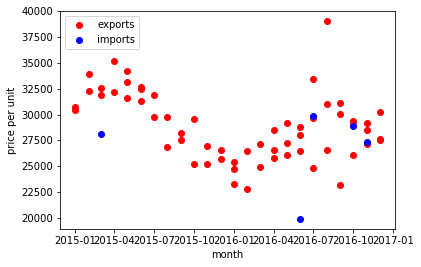

In [15]:
#Here's a trial run
plot_commodity(34361,south_africa,'EUR','24')